# Oxidation Kinetics of Copper Inside LP-CVD Chamber

## Introduction and Literature Review
Bjorck et al. have proposed a model for the kinetics of copper oxidation under low partial pressures of oxygen (Bjorck et al. 2013). In their model to predict mass gain due to oxidation at low partial pressure of oxygen, the Bjorck et al. considered two terms: one representing linear mass gain as a function of time; the other representing parabolic mass gain as a function of time. In their model, they found that depending on temperature and partial pressure conditions, either the linear or parabolic term would dominate. Their model, based on  Wagner and Grünewald (1938) as well as Rönnqvist and Fischmeister (1961), modeled the mass gain, $x$, as a function of time, $t$:

$$\frac{x}{k_l} + \frac{x^2}{k_p} = t + t_0$$



# TODO:
* write equations for $k_l$ and $k_p$, and then see if you can just go ahead and calculate the whole monster in one go
* write equation for R, and allow for values to be plugged in after the fact to show that the linear regime is a good approximation

## Dependencies:
* Sympy
* numpy
* ipykernel
* matplotlib

I use an Anaconda environment with sympy and ipykernel installed. This by default pretty-prints all expressions in latex.

In [1]:
import sympy
sympy.init_printing()

## Writing the overall equation for mass gain
First, let's write out the overall equation for x. This is the same as equation (4-2) in the paper, with the exception that I changed the $\pm$ to just a $+$, because they say to discard the negative solution (and the $+$ replacing the $\pm$ should always give a larger value. **NOTE:** it may not always be the case that a $-$ instead of the $\pm$ will give a negative value; I should check this)

In [2]:
k_p, k_l, t, t_0 = sympy.symbols("k_p, k_l, t, t_0")

In [3]:
x = sympy.Rational(1/2)*(-k_p/k_l + sympy.sqrt((k_p/k_l)**2 + 4*k_p*(t + t_0)))

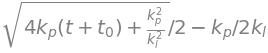

In [4]:
x

In [5]:
n_p, A_1, A_2, A_l, F_p, P_O2, P_O2ref_p, P_O2ref_l, R, T, T_ref, n_l, e, E_1, E_2, E_l  = sympy.symbols("n_p, A_1, A_2, A_l, F_p, P_{O_2}, P_{O_2}^{ref\,p}, P_{O_2}^{ref\,l}, R, T, T_ref, n_l, e, E_1, E_2, E_l ")

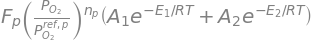

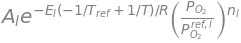

In [6]:
# the expression for k_p, eqn (4-3)
k_p_expr = F_p*(P_O2/P_O2ref_p)**n_p*(A_1*e**-(E_1/R/T) + A_2*e**-(E_2/R/T))
display(k_p_expr)

# the expression for k_l, eqn (4-4)
k_l_expr = A_l*(P_O2/P_O2ref_l)**n_l*e**(-E_l/R*(1/T - 1/T_ref))
display(k_l_expr)

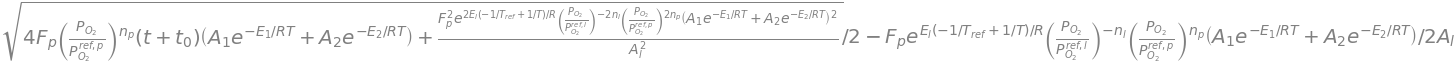

In [7]:
x_substituted = x.subs([(k_p, k_p_expr), (k_l, k_l_expr)])
display(x_substituted)

In [8]:
# calculate the time they kept their sample in, in seconds; they write 8 hours
8*60*60

In [9]:
from sympy.physics.units import gram, mol, second, kelvin, joule, pascal, cm

# fitted values for both regimes, from table 2-1 and 4-5. Should be independent of experiment.
fitted_values = {
    #parabolic:
    A_1: 634*gram**2/(cm**4*second), A_2: 8.67e-4*gram**2/(cm**4*second), 
    E_1: 248e3*joule/mol, E_2:103e3*joule/mol,
    
    #linear:
    A_l: 1.19e-7*gram/cm**2/second, E_l: 27e3*joule/mol, n_l: 1.04, n_p: 0, F_p: 0.83,
    
    #universal constants:
    e: 2.718281828459045, R: 8.31446261815324*joule/kelvin/mol
}

# values constant for all experiments by Bjorck et al
experiment_constants = {
    P_O2ref_p: 2.1e4*pascal,
    P_O2ref_l: 100*pascal,
    T_ref: 1173.15*kelvin,
    t: 28800*second #see cell above
}

experiment_values = {
    # conditions for each of the experiments performed by Bjorck et al. 
    # Key is the two-character code they used, value is a dict of conditons
    "1A": {
        P_O2: 2.1e4,
        T: 543.15,
        t_0: 350 # no time offset specified for this experiment, taking 350 to be roughly between the other offsets
    },
    
    "1B": {
        P_O2: 2.1e4*pascal,
        T: 1173.15*kelvin,
        t_0: 396*second
    },
    
    "4B": {
        P_O2: 10*pascal,
        T: 1173.15*kelvin,
        t_0: 0*second
    }
    
}

all_conditions = {**fitted_values, **experiment_constants, **(experiment_values["1B"])}
print(all_conditions)

# calculate the 
x_substituted.evalf(subs=all_conditions)

{A_1: 634*gram**2/(centimeter**4*second), A_2: 0.000867*gram**2/(centimeter**4*second), E_1: 248000.0*joule/mole, E_2: 103000.0*joule/mole, A_l: 1.19e-7*gram/(centimeter**2*second), E_l: 27000.0*joule/mole, n_l: 1.04, n_p: 0, F_p: 0.83, e: 2.718281828459045, R: 8.31446261815324*joule/(kelvin*mole), P_{O_2}^{ref,p}: 21000.0*pascal, P_{O_2}^{ref,l}: 100*pascal, T_ref: 1173.15*kelvin, t: 28800*second, P_{O_2}: 21000.0*pascal, T: 1173.15*kelvin, t_0: 396*second}


0.02578697522472⋅gram
─────────────────────
               2     
     centimeter      

In [10]:
# approximate as linear rate law:
x_linear = k_l*(t + t_0)
x_linear_substituted = x_linear.subs(k_l, k_l_expr)

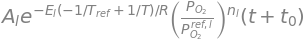

In [11]:
x_linear_substituted

In [12]:
x_substituted.evalf(subs=all_conditions)

0.02578697522472⋅gram
─────────────────────
               2     
     centimeter      

For experiment 1B, the authors claim to have calculated 18.6 $mg/cm^2$ growth after 8 hours. My result, from simulating the combination of linear and parabolic regimes produces something about 40 times higher, 848 $mg/cm^2$. Approximating with just a linear behaviour gives an even larger (significantly) result: 904 $mg/cm^2$. I suspect that the authors approximated with just the parabolic regime:

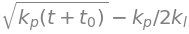

In [13]:
x_parabolic = sympy.sqrt(k_p*(t+t_0)) - sympy.Rational(1/2)*k_p/k_l
x_parabolic

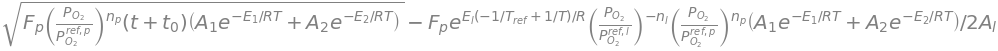

In [14]:
x_parabolic_substituted = x_parabolic.subs([(k_p, k_p_expr), (k_l, k_l_expr)])
x_parabolic_substituted

In [15]:
x_parabolic_substituted.evalf(subs=all_conditions)

0.0257842336953041⋅gram
───────────────────────
                2      
      centimeter       

clearly, approximation via assumption of parabolic regime does not work either. This gives a nonsensical negative value.

In [16]:
# calculate the R value. CAUTION: R is already defined and used as the gas constant.
R_expr = 4*k_l**2/k_p*(t+t_0)
R_expr

In [17]:
R_expr.subs([(k_p, k_p_expr), (k_l, k_l_expr)]).evalf(subs=all_conditions)

Since the $R$ defined by the authors (NOT the gas constant) is about 0.16, linear kinetics should dominate. This would make parabolic approximation inappropriate, and would explain the negative value seen above.

**HOWEVER**, The authors specifically place this experiment in the parabolic regime. This means that one of my $k_p$ or $k_l$ values are off; this in turn means that either the equation for one of them is wrong, or the numbers I am substituting in are wrong. 

Perhaps the problem is the $\pm$ in equation (4-2)? Check this by identifying whether it is possible that a minus sign instead of $\pm$ would still give a positive value; check that by checking whether $-k_p/k_l$ is indeed negative. If $-k_p/k_l$ is indeed negative, then the $\pm$ must be $+$ (as calculated) and this reason for the problem is excluded. 

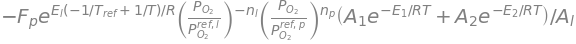

-0.000757524287101073⋅gram 
───────────────────────────
                  2        
        centimeter         

In [18]:
expr = (-k_p/k_l).subs([(k_p, k_p_expr), (k_l, k_l_expr)])
display(expr)
expr.evalf(subs=all_conditions)

Nope, it is indeed negative. Therefore $\pm$ must have been $+$, as it already is, and therefore the calculation should have been sound. Clearly they were not; either some number is wrong, some unit is wrong, or some equation is wrong.

## Calculating oxide thickness for our conditions
I am assuming 2000 mTorr pressure of $Ar/O_2$ mix. The mixture is 500 ppm $O_2$

In [19]:
from sympy.physics.units import torr, convert_to
# total partial pressure of O_2:
O2_pp = convert_to(2*torr*500/1e6, pascal)
O2_pp

0.133322387415⋅pascal

In [20]:
our_conditions = all_conditions
our_conditions

⎧                2                          2                                                                                                                                                                      
⎪        634⋅gram              0.000867⋅gram            1.19e-7⋅gram         248000.0⋅joule      103000.0⋅joule      27000.0⋅joule                                                                                 
⎨A₁: ──────────────────, A₂: ──────────────────, Aₗ: ──────────────────, E₁: ──────────────, E₂: ──────────────, Eₗ: ─────────────, Fₚ: 0.83, P_{O_2}: 21000.0⋅pascal, P_{O_2}__{ref,l}: 100⋅pascal, P_{O_2}__{ref,
⎪              4                       4                       2                  mole                mole                mole                                                                                     
⎩    centimeter ⋅second      centimeter ⋅second      centimeter ⋅second                                                                                 

In [21]:
our_conditions[T] = 1273.15*kelvin
our_conditions[P_O2] = O2_pp
our_conditions

⎧                2                          2                                                                                                                                                                      
⎪        634⋅gram              0.000867⋅gram            1.19e-7⋅gram         248000.0⋅joule      103000.0⋅joule      27000.0⋅joule                                                                                 
⎨A₁: ──────────────────, A₂: ──────────────────, Aₗ: ──────────────────, E₁: ──────────────, E₂: ──────────────, Eₗ: ─────────────, Fₚ: 0.83, P_{O_2}: 0.133322387415⋅pascal, P_{O_2}__{ref,l}: 100⋅pascal, P_{O_2}
⎪              4                       4                       2                  mole                mole                mole                                                                                     
⎩    centimeter ⋅second      centimeter ⋅second      centimeter ⋅second                                                                                 

In [22]:
x_substituted.evalf(subs=our_conditions)

4.41766906078556e-6⋅gram
────────────────────────
                2       
      centimeter        

In [23]:
thickness = x_substituted/(6*gram/cm**3)
t_8h = thickness.evalf(subs=our_conditions)
t_8h

7.36278176797593e-7⋅centimeter

In [24]:
from sympy.physics.units import nm
convert_to(t_8h, nm)

7.36278176797593⋅nanometer

In [25]:
conditions_but_time = our_conditions
conditions_but_time.pop(t)
conditions_but_time

⎧                2                          2                                                                                                                                                                      
⎪        634⋅gram              0.000867⋅gram            1.19e-7⋅gram         248000.0⋅joule      103000.0⋅joule      27000.0⋅joule                                                                                 
⎨A₁: ──────────────────, A₂: ──────────────────, Aₗ: ──────────────────, E₁: ──────────────, E₂: ──────────────, Eₗ: ─────────────, Fₚ: 0.83, P_{O_2}: 0.133322387415⋅pascal, P_{O_2}__{ref,l}: 100⋅pascal, P_{O_2}
⎪              4                       4                       2                  mole                mole                mole                                                                                     
⎩    centimeter ⋅second      centimeter ⋅second      centimeter ⋅second                                                                                 

In [26]:
conditions_but_time.get(t) == None

True

In [27]:
cond_100pa_4h = our_conditions
cond_100pa_4h[P_O2] = 100*pascal
cond_100pa_4h[t] = 4*60*60*second
x_substituted.evalf(subs=cond_100pa_4h)

0.00217933247269037⋅gram
────────────────────────
                2       
      centimeter        

In [28]:
all_conditions_4b =  {**fitted_values, **experiment_constants, **(experiment_values["4B"])}
x_substituted.evalf(subs=cond_100pa_4h)

0.00217933247269037⋅gram
────────────────────────
                2       
      centimeter        

In [29]:
x_linear_substituted.evalf(subs=cond_100pa_4h)

0.00218834066710021⋅gram
────────────────────────
                2       
      centimeter        

In [30]:
cond_100pa_8h = cond_100pa_4h
cond_100pa_8h[t] = 8*60*60*second
x_substituted.evalf(subs=cond_100pa_8h)

0.00428331488698031⋅gram
────────────────────────
                2       
      centimeter        

Since it is assumed that the function is in the linear regime, we can simply find the coefficient by dividing `t_8h` by 8 hours and then multiplying this by whatever time we want. Plot of this below:

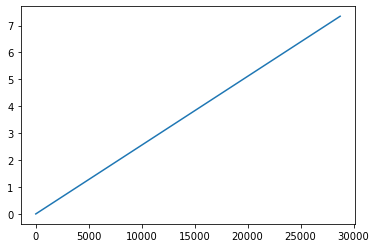

In [31]:
# define thick_lam as a lamdified thickness, so it can be efficiently computed from a numpy arange of times
import numpy
import matplotlib.pyplot as plt

times = numpy.arange(0, 28800.0, 60.0)
thicknesses = []

#coeff = t_8h/28800
coeff = 7.36278176797593/28800
#display(x_substituted.subs(conditions_but_time))

#thick_lam = sympy.lambdify(t, x_substituted.subs(conditions_but_time), "numpy")
for time in times:
    thicknesses.append(coeff*time)

plt.plot(times, thicknesses)

## Oxidation at 200 Torr
We can reach 200 Torr with the rough pump and the flow valve (E9) closed, but this would require the poppet valve to close as well. That would mean that the diffusion pump would not be pumped for the duration of the oxidation, and this would put a limit on the time that we have to oxidize (roughly 5-10 minutes max). First, it is necessary to determine whether 5 minutes of oxidation at 200 Torr at 500 ppm is enough time for us to get into the approximate range of $10^{-8}m$:

In [32]:
# what is the partial pressure at 200 Torr and 500 ppm O_2?
O2_part_pres_200torr = 200*torr*(500/1e6)
display(O2_part_pres_200torr)
convert_to(O2_part_pres_200torr, pascal)

0.1⋅mmHg

13.3322387415⋅pascal

In [33]:
cond_200_torr = our_conditions
cond_200_torr[t] = 5*60*second # 5 minutes
cond_200_torr[P_O2] = convert_to(O2_part_pres_200torr, pascal) # our pressure
cond_200_torr

⎧                2                          2                                                                                                                                                                      
⎪        634⋅gram              0.000867⋅gram            1.19e-7⋅gram         248000.0⋅joule      103000.0⋅joule      27000.0⋅joule                                                                                 
⎨A₁: ──────────────────, A₂: ──────────────────, Aₗ: ──────────────────, E₁: ──────────────, E₂: ──────────────, Eₗ: ─────────────, Fₚ: 0.83, P_{O_2}: 13.3322387415⋅pascal, P_{O_2}__{ref,l}: 100⋅pascal, P_{O_2}_
⎪              4                       4                       2                  mole                mole                mole                                                                                     
⎩    centimeter ⋅second      centimeter ⋅second      centimeter ⋅second                                                                                 

In [34]:
# calculate oxidation thickness in our new conditions
convert_to(x_substituted.evalf(subs=cond_200_torr)/(6*gram/cm**3), nm)

21.1021409857182⋅nanometer

In [35]:
temp_800_torr_200 = cond_200_torr
temp_800_torr_200[T] = 1073.15*kelvin
convert_to(x_substituted.evalf(subs=temp_800_torr_200)/(6*gram/cm**3), nm)

13.1183081545731⋅nanometer

In [36]:
R_substituted = R_expr.subs([(k_p, k_p_expr), (k_l, k_l_expr)])
R_substituted.evalf(subs=cond_200_torr)

This is enough!! Perhaps, even too much. **TODO:** plot out thicknesses at different time points in this range 

In [37]:
numpy.arange?

In [38]:
import math
1/math.tan(5*math.pi/180)*0.075

In [39]:
math.tan(5*math.pi/180)*1.6

In [1]:
import values
import equations

In [2]:
conditions = values.getExperimentConds("1B")
equations.x_substituted.evalf(subs=conditions)

0.02578697522472*gram/centimeter**2

In [3]:
values.getMassGain("1B")

0.02578697522472*gram/centimeter**2

In [45]:
import equations
equations.x_substituted.evalf(subs=values.getExperimentConds("1A", t=4*60*60*second))

3.58630227933416e-5⋅gram
────────────────────────
                2       
      centimeter        

In [6]:
import sympy
sympy.Expr.subs?